The primary focus of this project is to show a numerical solution to the Lorenz equations, which is a set of differential equations that helped to evolve the study of deterministic chaos [3]. To help introduce 

## Equations

#### Lorenz 
\begin{equation*}
\frac{dx}{dt} = \sigma (y - x) \\ 
\frac{dy}{dt} = x (\rho - z) - y \\
\frac{dz}{dt} = xy - \beta z
\end{equation*}

#### Dampened Driven Nonlinear Pendulum
\begin{equation*}
\frac{d^2\theta}{dt^2} = -\frac{g}{l} \sin (\theta) - F_f \frac{d\theta}{dt} + F_d \sin (\Omega_d t)
\end{equation*}

**References:**

[1] Newman  
[2] Giordano  
[3] Muthuramalingam, Rasi. (2013). ANALYTICAL SOLUTION OF LORENZ EQUATION USING HOMOTOPY ANALYSIS METHOD. 
Journal of Global Research in Mathematical Archives. 1. 14. 
https://www.researchgate.net/publication/273641652_ANALYTICAL_SOLUTION_OF_LORENZ_EQUATION_USING_HOMOTOPY_ANALYSIS_METHOD  


In [1]:
import numpy as np
import RungeKutta as rk
import pylab as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
def lorenzHAMApprox (r, t, r0, sigma, rho, beta, h):
    x, y, z = r
    x0, y0, z0 = r0
    
    fx = x0 - sigma * t (1 + h)
    fy = y0 - t * [1 + h (rho - 1)]
    fz = z0 - t * (beta + h)
    return np.array ([fx, fy, fz], float)

def lorenz (r, t, state):
    x, y, z = r
    sigma, rho, beta = state
    
    fx = sigma * (y - x)
    fy = x * (rho - z) - y
    fz = x * y - beta * z
    
    return np.array ([fx, fy, fz], float)

def lorenz2 (t, r, state):
    x, y, z = r
    sigma, rho, beta = state
    
    fx = sigma * (y - x)
    fy = x * (rho - z) - y
    fz = x * y - beta * z
    
    return np.array ([fx, fy, fz], float)


def lorenz3 (r, t):
    x, y, z = r
    sigma = 10.0
    rho = 28.0
    beta = 8.0 / 3.0
    
    fx = sigma * (y - x)
    fy = x * (rho - z) - y
    fz = x * y - beta * z
    return np.array ([fx, fy, fz], float)  # derivatives




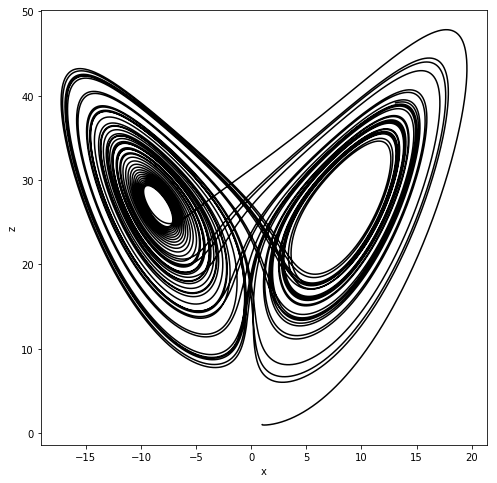

In [71]:
if __name__ == "__main__":
    sigma = 10.0
    rho = 28.0
    beta = 8.0 / 3.0
    state = (sigma, rho, beta)
    
    r0 = (1, 1, 1)
    
    interval = (0, 50)
    steps = 100000
    order = 4
    numIndepVars = 3
    t = np.arange (interval[0], interval[1], interval[1] / steps)
    
    solution = rk.vectorRungeKutta (lorenz, numIndepVars, r0, interval, steps, state, order = 4)
    
    #set up plot
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111)
    ax.set_xlabel("x")
    ax.set_ylabel("z")

    plt.plot(solution[:,1], solution[:,3], "-k")
    
    plt.legend()
    plt.show ()

    

In [63]:
def nonlinearOscillator (r, t, g, l, F_f, F_d, omega_d):
    omega, theta = r
    
    fomega = -g /l * np.sin (theta) - F_f * omega + F_d * np.sin (omega_d * t)
    ftheta = omega
    
    if np.pi < -ftheta:
        ftheta + 2 * np.pi
    elif np.pi > ftheta: 
        ftheta - 2 * np.pi
    
    return np.array ([fomega, ftheta], float)

[[  0.00000000e+00   0.00000000e+00   2.00000000e-01]
 [  1.00000000e-02  -1.96506375e-03   1.99990139e-01]
 [  2.00000000e-02  -3.88688558e-03   1.99960843e-01]
 ..., 
 [  9.99800000e+01  -5.97272835e-01  -5.27501657e-02]
 [  9.99900000e+01  -5.96886818e-01  -5.87209905e-02]
 [  1.00000000e+02  -5.96469007e-01  -6.46877961e-02]]
[ 0.001       0.00099995  0.0009998   0.00099956  0.00099922  0.00099879
  0.00099825  0.00099763  0.00099691  0.00099609  0.00099518  0.00099418
  0.00099309  0.00099191  0.00099063  0.00098926  0.00098781  0.00098626
  0.00098463  0.00098291  0.0009811   0.0009792   0.00097722  0.00097515
  0.00097299  0.00097076  0.00096843  0.00096603  0.00096354  0.00096097
  0.00095832  0.00095559  0.00095278  0.00094989  0.00094692  0.00094387
  0.00094074  0.00093754  0.00093427  0.00093091  0.00092749  0.00092399
  0.00092041  0.00091677  0.00091305  0.00090926  0.0009054   0.00090147
  0.00089748  0.00089341  0.00088928  0.00088508  0.00088082  0.00087649
  0.0008720

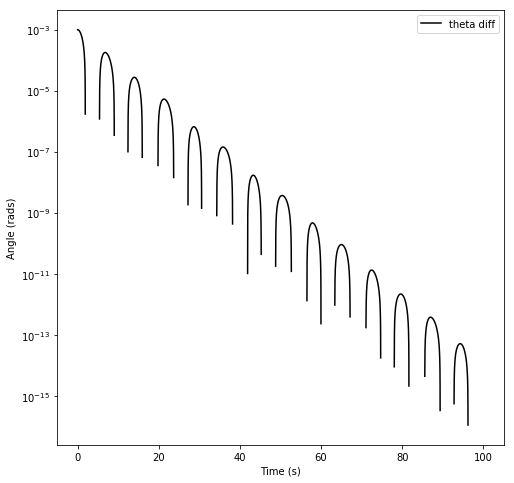

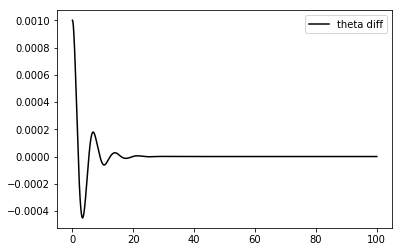

In [68]:
if "__main__" == __name__:
    r0 = (0.0, 0.2) #omega, theta
    
    interval = (0,100)
    steps = 10000
    order = 4
    numIndepVars = 2
    
    g = 9.8
    l = 9.8
    F_f = 0.5
    F_d = 0.5
    omega_d = 2/3
    
    solution = rk.vectorRungeKutta (nonlinearOscillator, numIndepVars, r0, interval, steps, g, l, F_f, F_d, omega_d, order = 4)
    r0 = (r0[0], r0[1] + 0.001)
    solution2 = rk.vectorRungeKutta (nonlinearOscillator, numIndepVars, r0, interval, steps, g, l, F_f, F_d, omega_d, order = 4)
    
    diff = solution2 - solution
    print (solution)
    print (diff[:100,2])
    #set up plot
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Angle (rads)")

    #plt.plot(solution[:,0],solution2[:,2], "--k", label = "theta2")
    #plt.plot(solution[:,2],solution[:,1], "-y", label = "theta")
    plt.semilogy(solution[:,0], diff[:,2], "-k", label = "theta diff")
  
    plt.legend()
    plt.show ()
    
    plt.plot(solution[:,0], diff[:,2], "-k", label = "theta diff")
    
    plt.legend()
    plt.show ()